**import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the file**

In [2]:
df = pd.read_csv("../data/fraud_data.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.columns 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Checking number of Frauds and legit transactions

In [6]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Checking for Null values

In [8]:
df.isnull().sum().sum()

0

The imbalance in the dataset

In [9]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
i = (df["isFraud"].value_counts()[1] / df.shape[0] ) * 100
print(f"The inmabalce in the dataset; Percent of fraud transactions = {round(i,3)} % out of {df.shape[0]} transactions")

The inmabalce in the dataset; Percent of fraud transactions = 0.129 % out of 6362620 transactions


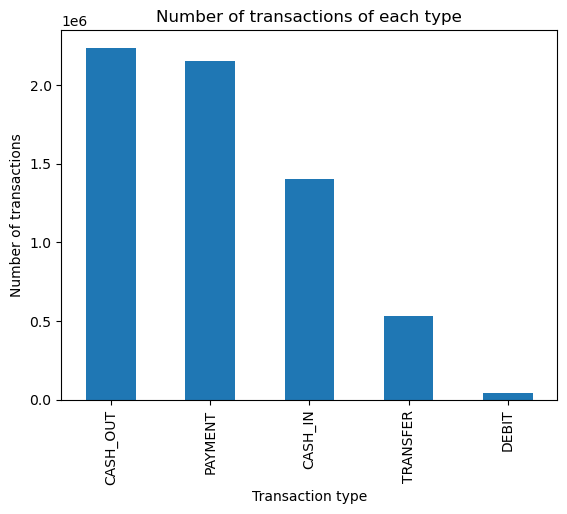

In [11]:
df["type"].value_counts().plot(kind = "bar", title = "Number of transactions of each type")
plt.xlabel("Transaction type")
plt.ylabel("Number of transactions")
plt.show()

**Observations** : We can see that most frequent type of transaction is CASH_OUT, then PAYMENT and little lesser frequent is CASH_IN

Checking mean of number of frauds in each type of transaction

In [12]:
fraud_by_type = df.groupby("type")["isFraud"].mean()
print(fraud_by_type)

type
CASH_IN     0.000000
CASH_OUT    0.001840
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007688
Name: isFraud, dtype: float64


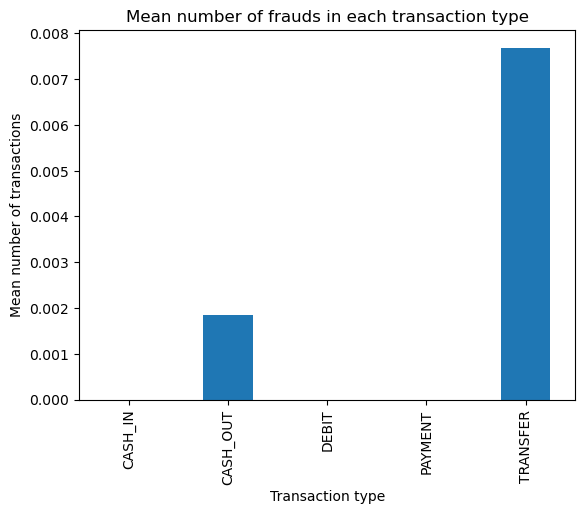

In [13]:
fraud_by_type.plot(kind = "bar", title = "Mean number of frauds in each transaction type")
plt.xlabel("Transaction type")
plt.ylabel("Mean number of transactions")
plt.show()

**Observations** : The number of frauds is maximum in TRANSFER, then in CASH_OUT and 0 in other transaction types.

Checking the AMOUNT column

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

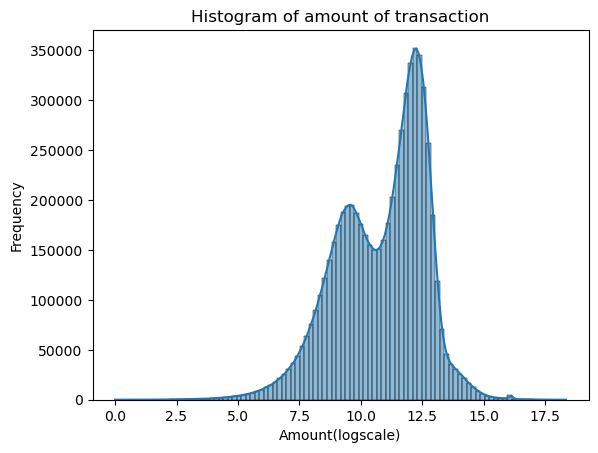

In [15]:
sns.histplot(np.log1p(df["amount"]), bins = 100, kde = True)
plt.title("Histogram of amount of transaction")
plt.xlabel("Amount(logscale)")
plt.ylabel("Frequency")
plt.show()

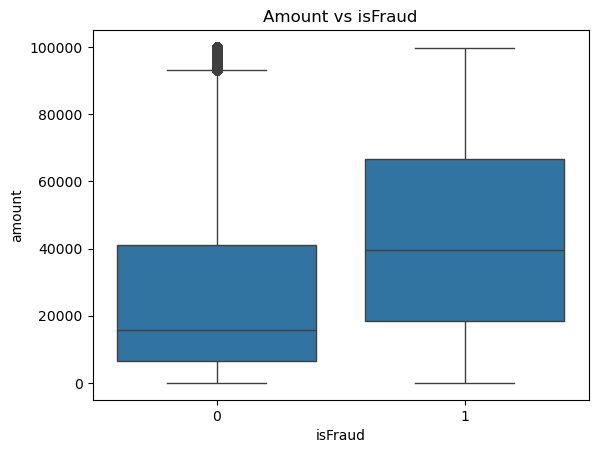

In [16]:
sns.boxplot(data = df[df["amount"] < 100000], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud")
plt.show()

isFraud
0     178197
1    1467967
Name: amount, dtype: int32


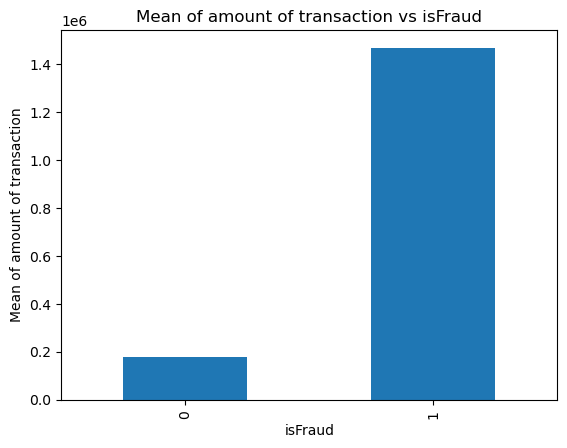

In [17]:
amount_by_type = df.groupby("isFraud")["amount"].mean()
print(amount_by_type.astype(int))
amount_by_type.plot(kind = "bar", title = "Mean of amount of transaction vs isFraud")
plt.xlabel("isFraud")
plt.ylabel("Mean of amount of transaction")
plt.show()

**Observation**: The amount of transaction has higher median and mean value when it is Fraudulent transaction.

Top fraud users

In [18]:
fraud_users = df[df["isFraud"]==1] ["nameOrig"].value_counts().head(10)
print(fraud_users)

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64


Finding correlation of columns(except step, type, nameOrig, nameDest, and isFlaggedFraud) since step and isFlaggedFraud are not useful and others have string dataype

In [19]:
correlation_matrix = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()
print(correlation_matrix)

                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   
isFraud         0.076688       0.010154       -0.008148       -0.005885   

                newbalanceDest   isFraud  
amount                0.459304  0.076688  
oldbalanceOrg         0.042029  0.010154  
newbalanceOrig        0.041837 -0.008148  
oldbalanceDest        0.976569 -0.005885  
newbalanceDest        1.000000  0.000535  
isFraud               0.000535  1.000000  


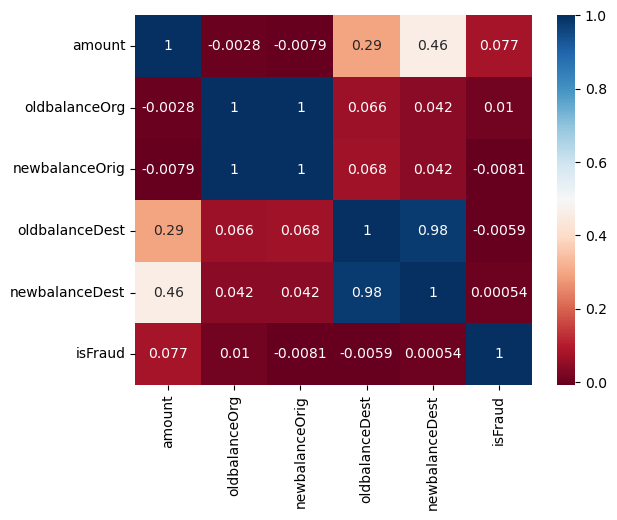

In [20]:
sns.heatmap(data = correlation_matrix, cmap = "RdBu", annot = True)
plt.show()

**Observations** : oldbalanceOrg & newbalanceOrg are highly correlated and newbalanceDest & oldbalanceDest are highly correlated as they are just addition of transaction amount(constant) to the other variable.

Checking the transaction amounts that are very high as compared to account balance

In [21]:
df['amount_to_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # add 1 to avoid division by zero
df.sort_values(by="amount_to_balance_ratio", ascending=False).head(20)



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_to_balance_ratio
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0,0,92445516.64
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0,73823490.36
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0,71172480.42
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0,69886731.30
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0,69337316.27
3937152,286,TRANSFER,67500761.29,C811810230,0.0,0.0,C1757599079,8.635615e+07,1.538569e+08,0,0,67500761.29
4105338,302,TRANSFER,66761272.21,C420748282,0.0,0.0,C1073241084,6.874206e+07,1.355033e+08,0,0,66761272.21
3892529,284,TRANSFER,64234448.19,C1139847449,0.0,0.0,C65111466,6.597691e+07,1.663021e+08,0,0,64234448.19
3991638,298,TRANSFER,63847992.58,C300140823,0.0,0.0,C514940761,7.217149e+07,1.360195e+08,0,0,63847992.58
4143801,303,TRANSFER,63294839.63,C372535854,0.0,0.0,C1871605747,7.512528e+07,1.384201e+08,0,0,63294839.63


Even with high amount to old balance ratio, we can not say if the transaction was fraud.